In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
# load the data genearted for london and create h3 hexagon for it for representation
ROOTFOLDER = "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was/_data/_curated"
EXPORT_FOLDER = f"{ROOTFOLDER}/c_city_classifier_result/"
hex_csv_folder = f"{ROOTFOLDER}/c_city_classifier_agg_hex_csv"
if not os.path.exists(hex_csv_folder):
    os.makedirs(hex_csv_folder)

def load_all():
    serviceaccount = "/Users/yuan/Dropbox (Personal)/personal files/ssh/google_drive_personal.json"
    import gspread

    # from oauth2client.service_account import ServiceAccountCredentials
    gc = gspread.service_account(filename=serviceaccount)


    def read_url(url, SHEET_NAME):
        SHEET_ID = url.split("/")[5]
        spreadsheet = gc.open_by_key(SHEET_ID)
        worksheet = spreadsheet.worksheet(SHEET_NAME)
        rows = worksheet.get_all_records()
        df_spread = pd.DataFrame(rows)
        return df_spread, worksheet


    url = "https://docs.google.com/spreadsheets/d/1o5gFmZPUoDwrrbfE6M26uJF3HnEZll02ivnOxP6K6Xw/edit?usp=sharing"
    SHEETNAME = "select_city_classifier"
    city_meta, other_worksheet = read_url(url, SHEETNAME)
    city_meta = city_meta[city_meta['City']!=''].reset_index(drop = True)
    return city_meta

city_meta = load_all()

In [2]:
city_meta = pd.read_csv(f"{ROOTFOLDER}/_export/city_meta.csv")
city_meta.head()

,City,Country,Continent,State/Province,center_lat,center_lng,label,num_panoid,GSV Downloaded,Road Injury literature,left,bottom,right,top,urban_pop,pop source,country_clean,county_ls
0,Buenos Aires,Argentina,South America,Buenos Aires,-34.599589,-58.380564,18,606938,2365132,NaN,-58.531449,-34.705181,-58.335352,-34.526573,3120612,2022,Argentina,[]
1,Sydney,Australia,Australia,New South Wales,-33.870453,151.208755,112,3411953,1413083,NaN,150.264995,-34.171875,151.341577,-33.378928,5312000,2019,Australia,[]
2,Vienna,Austria,Europe,Vienna,48.208166,16.371864,122,1166126,319435,NaN,16.182084,48.118545,16.577249,48.320919,1897000,2019,Austria,[]
3,Saidpur,Bangladesh,Asia,Rangpur Division,25.778031,88.897626,102,4442,12721,https://journals-sagepub-com.eproxy.lib.hku.hk...,88.851607,25.740739,88.995211,25.863039,24338,2011,Bangladesh,[]
4,Rajshahi,Bangladesh,Asia,Rajshahi,24.374650,88.600367,95,240371,186022,https://journals-sagepub-com.eproxy.lib.hku.hk...,88.017099,23.812853,89.754481,25.270728,984000,2024,Bangladesh,[]


In [10]:
# "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was/_data/_curated/c_city_classifier_agg_hex"
# city = "Boston"
city_ls = ["Boston", "Paris", "Singapore", "London", "Sao Paulo"]
city = "New York"
cityabbrlower = city.lower().replace(" ", "")
df = pd.read_parquet(f"{ROOTFOLDER}/c_city_classifier_agg_hex/c_{cityabbrlower}_hex.parquet")
df.to_csv(f"{hex_csv_folder}/c_{cityabbrlower}_hex.csv", index = False)
df.head()

,h3_9,img_count,sel_class,winning_prop,correct_class_prop,dist_hav,ring,max_count_false,top_1_false_prop,top_1_false
0,892a100f567ffff,4,Accra,0.25,0.0,6864.052784,9.0,1.0,0.25,Accra
1,892a100f567ffff,4,Accra,0.25,0.0,6864.052784,9.0,1.0,0.25,Guatemala City
2,892a100f567ffff,4,Accra,0.25,0.0,6864.052784,9.0,1.0,0.25,Istanbul
3,892a100f567ffff,4,Accra,0.25,0.0,6864.052784,9.0,1.0,0.25,Philadelphia
4,892a1039c8fffff,8,Amsterdam,0.25,0.0,19333.469342,9.0,2.0,0.25,Amsterdam


In [11]:
# fig 1. Distribution of mis classified hexagons
correct_df = df[df['sel_class']==city]
correct_rate = correct_df.shape[0]/df.shape[0]
print(f"Correct rate: {correct_rate}. Total hexagons: {df.shape[0]}")

Correct rate: 0.908358627130516. Total hexagons: 8566


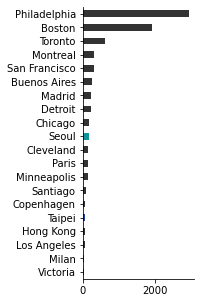

In [12]:
# fig 1. Distribution of top mis classified cities
import seaborn as sns
colorls = {
    # for london
    # "Manchester": "#DDB27C",
    # "Sheffield": "#125C77",
    # "Paris":"#DA70BF",
    # "Zwolle":"#12939A",
    # "Brussels":"#223F9A",
    # "Amsterdam":"#DDB27C",
    # "Copenhagen":"#F15C17",
    # "Antwerp":"#88572C",
    # "Rome":"#DDB27C",
    # "Le Mans":"#125C77",
    "Taipei":"#223F9A",
    "Singapore":"#88572C",
    "Kuala Lumpur":"#FF991F",
    "Seoul":"#12939A",
    "Cebu City":"#12939A",
    
    "Florianopolis":"#FF991F",
    "Bangkok":"#125C77",
    "Jarkata":"#88572C",
    "Palermo":"#DDB27C",
    "Athens":"#125C77",


}
coloroptions = list(colorls.values())
fig, ax = plt.subplots(figsize=(2,5))
to_viz = df['top_1_false'].value_counts()[:20].sort_values(ascending = True)
to_viz.plot(kind='barh', color=[colorls.get(x, '#333333') for x in to_viz.index])
sns.despine()

In [13]:
df.to_csv(f"{EXPORT_FOLDER}/c_{cityabbrlower}_hex.csv", index = False)

In [98]:
CURATED_FOLDER_TARGET = f"{ROOTFOLDER}/c_city_classifier_agg_hex"
df = pd.read_csv(os.path.join(CURATED_FOLDER_TARGET, "c_hex_agg_all.csv"))
# construct a dataframe with city <> mis_classified_city, proportion of missclassification per hex
def get_summary_by_city(df, ringls= ["all"]):
    if ringls == ["all"]:
        df_summary = df.copy()
    else:
        ring_min = ringls[0]
        ring_max = ringls[1]
        print(ring_min, ring_max)
        df_summary = df[(df['ring']>=ring_min)&(df['ring']<=ring_max)].reset_index(drop = True)
    df_summary['total_hex'] = df_summary.groupby("source_city")["h3_9"].transform("count")

    # most unidentifieable city
    df_summary['correct'] = df_summary['sel_class']==df_summary["source_city"]
    df_summary_city = df_summary.groupby(['source_city','total_hex'])['correct'].mean().reset_index()
    df_summary_city.sort_values(["correct"], ascending = True).head(10)
    df_summary_city_merge = df_summary_city.merge(
        city_meta[['City','country_clean', 'Continent','urban_pop','center_lat',
        'center_lng']], left_on = "source_city", right_on = "City"
    )
    return df_summary_city_merge


In [102]:
df_summary_city_merge = get_summary_by_city(df)
df_summary_city_merge_old = get_summary_by_city(df, ringls= [1,2])
df_summary_city_merge_medium = get_summary_by_city(df, ringls= [2,3])

1 2
2 3


In [108]:
df_summary_city_merge_old['ring'] = 'inner'
df_summary_city_merge_medium['ring'] = 'outer'
df_summary_city_merge['ring'] = 'all'
df_all = pd.concat([df_summary_city_merge_old,
                    df_summary_city_merge_medium,
                    # df_summary_city_merge
                    ]).reset_index(drop = True)

In [109]:
# df_with = df[df['ring']!=9].reset_index(drop = True)
# df_with['ring_update'] = df_with['ring'].apply(lambda x: round(x))
# df_with_summary = df_with.groupby(['source_city', 'ring'])

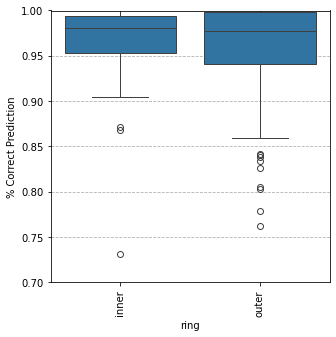

In [114]:
# seaborn plot
fig, ax = plt.subplots(figsize=(5,5))
to_viz = df_all.sort_values("correct", ascending = True)

sns.boxplot(
    data = to_viz,
    # hue = "Continent",
    y = "correct",
    x = "ring"
)
plt.ylim(0.7,1)
# rotate the x-axis
plt.xticks(rotation=90)

plt.ylabel("% Correct Prediction")
# show main grids
plt.grid(axis='y', linestyle='--')

In [124]:
# build the graph between city and their misclassified cities
def get_graph_community(df_summary, fname = "all"):
    df_summary['total_hex'] = df_summary.groupby("source_city")["h3_9"].transform("count")
    df_summary_rel = df_summary.groupby(["source_city", "top_1_false",'total_hex']).size().reset_index().rename(columns = {0:"top1_false_count"})
    df_summary_rel['top1_false_prop'] = df_summary_rel["top1_false_count"]/df_summary_rel['total_hex']


    # merge the lat lon for map visualization
    df_summary_rel_merge = df_summary_rel.merge(city_meta[['City', 'Continent','urban_pop','center_lat',
        'center_lng']], left_on = "source_city", right_on = "City").drop("City",axis = 1)\
            .merge(city_meta[['City', 'center_lat',
        'center_lng']],left_on = "top_1_false", right_on = "City", suffixes=("_truth", "_pred")).drop("City",axis = 1)
            
    df_summary_rel_merge.to_csv(os.path.join(EXPORT_FOLDER, f"city_relationship_{fname}.csv"), index = False)
    return df_summary_rel_merge

In [125]:
df_inner = df[df['ring']<1.5].reset_index(drop = True)
df_outer = df[(df['ring']>=1.5)&(df['ring']<=3)].reset_index(drop = True)
df_inner_rel = get_graph_community(df_inner, fname = "inner_ring")
df_outer_rel = get_graph_community(df_outer, fname = "outer_ring")

In [128]:
import networkx as nx
G = nx.Graph()
for i, row in df_outer_rel.iterrows():
    G.add_edge(row["source_city"], row["top_1_false"], weight = row["top1_false_prop"])

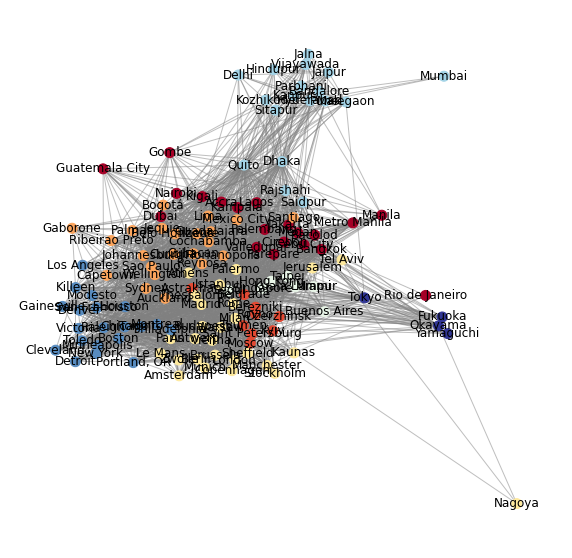

In [129]:
# plot the graph community by clustering
import community
partition = community.best_partition(G)
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.RdYlBu, 
                       node_color=list(partition.values()),
                       # add node name 
                       )
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="grey")
# add label to each node
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()})

plt.show()

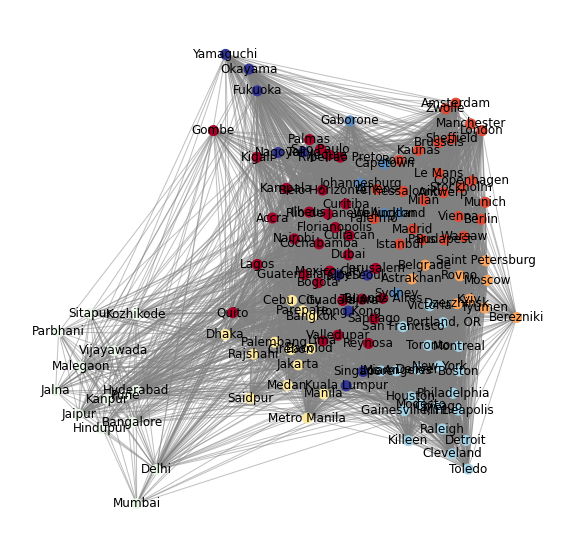

In [51]:
# plot the graph community by clustering
import community
partition = community.best_partition(G)
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.RdYlBu, 
                       node_color=list(partition.values()),
                       # add node name 
                       )
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="grey")
# add label to each node
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()})

plt.show()